In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('ev_eshyalari_dataset.csv')

In [3]:
df.head()

,item_name,material,weight_kg,brand,price_azn
0,Chair,Wood,5,IKEA,150
1,Table,Metal,12,IKEA,300
2,Sofa,Fabric,40,MebelLux,1200
3,Laptop,Plastic,2,Apple,3500
4,Armchair,Leather,25,RoyalMebel,950


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_name  10 non-null     object
 1   material   10 non-null     object
 2   weight_kg  10 non-null     int64 
 3   brand      10 non-null     object
 4   price_azn  10 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 532.0+ bytes


In [5]:
df.describe()

,weight_kg,price_azn
count,10.000000,10.000000
mean,20.700000,970.000000
std,17.518562,1007.802891
min,2.000000,150.000000
25%,10.500000,362.500000
50%,16.500000,575.000000
75%,23.750000,1137.500000
max,60.000000,3500.000000


In [8]:
df_encoded=pd.get_dummies(df,columns=['material','brand' ],dtype=int)

In [9]:
df_encoded

,item_name,weight_kg,price_azn,material_Fabric,material_Leather,material_Metal,material_Plastic,material_Wood,brand_Apple,brand_IKEA,brand_MebelLux,brand_RoyalMebel
0,Chair,5,150,0,0,0,0,1,0,1,0,0
1,Table,12,300,0,0,1,0,0,0,1,0,0
2,Sofa,40,1200,1,0,0,0,0,0,0,1,0
3,Laptop,2,3500,0,0,0,1,0,1,0,0,0
4,Armchair,25,950,0,1,0,0,0,0,0,0,1
5,Desk,15,500,0,0,0,0,1,0,1,0,0
6,Bed,60,1700,1,0,0,0,0,0,0,1,0
7,TV Stand,20,650,0,0,0,0,1,0,0,0,1
8,Bookshelf,18,400,0,0,1,0,0,0,1,0,0
9,Cabinet,10,350,0,0,0,1,0,0,1,0,0


In [10]:
X = df_encoded.drop(['item_name', 'price_azn'], axis=1)
y = df_encoded['price_azn']

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [16]:

y_pred = model.predict(X)


mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

results = pd.DataFrame({
    'Real Qiymət (AZN)': y,
    'Proqnoz Qiymət (AZN)': y_pred
})

print(results)


Mean Squared Error (MSE): 579.2910447761194
Root Mean Squared Error (RMSE): 24.06846577528612
   Real Qiymət (AZN)  Proqnoz Qiymət (AZN)
0                150            193.470149
1                300            271.082090
2               1200           1186.940299
3               3500           3500.000000
4                950            950.000000
5                500            456.529851
6               1700           1713.059701
7                650            650.000000
8                400            428.917910
9                350            350.000000


In [18]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, y_pred)

In [19]:
print(mae)

17.089552238806334


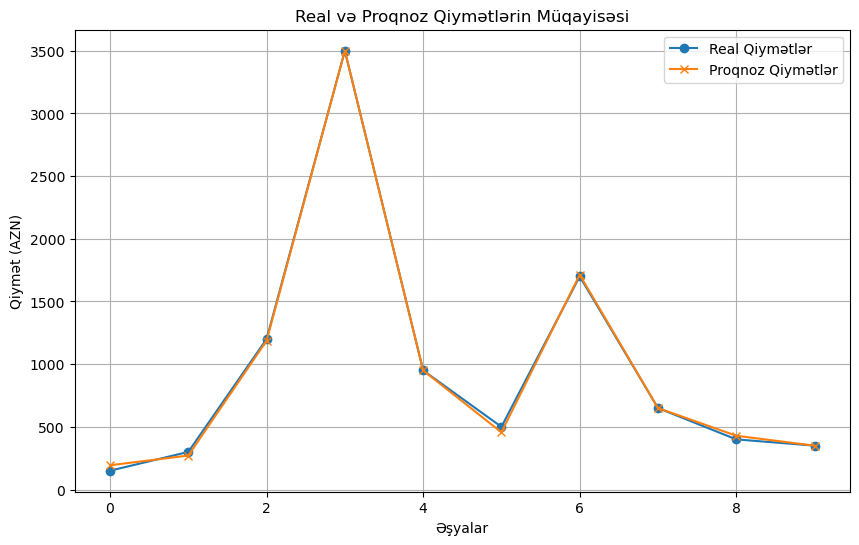

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(y.values, label='Real Qiymətlər', marker='o')

plt.plot(y_pred, label='Proqnoz Qiymətlər', marker='x')

plt.title('Real və Proqnoz Qiymətlərin Müqayisəsi')
plt.xlabel('Əşyalar')
plt.ylabel('Qiymət (AZN)')
plt.legend()
plt.grid(True)

plt.show()
